In [2]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [6]:
#Scrape a HTML table using pandas read_html function
html_df = pd.read_html(url)
html_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [61]:
table_df = html_df[0]
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [14]:
# Check data types
(table_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [15]:
#Convert data types as needed
table_df['terrestrial_date'] = pd.to_datetime(table_df['terrestrial_date'])

In [16]:
#Check data types again
table_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
#Obtain dataframe summary
table_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [81]:
#Find number of Martian days that exist in scraped dataset
table_df["sol"].nunique()

1867

In [101]:
months = table_df.groupby(['month']).mean()
months

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [115]:
#Find the average minimum temperatures per month
min_t = table_df.loc[:,'month':'min_temp'].groupby('month').mean('min_temp')
min_t

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


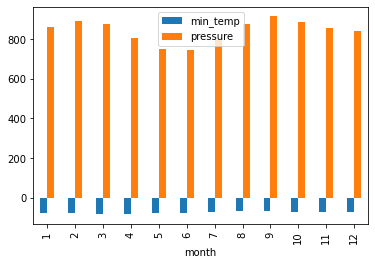

In [138]:
#Plot the average minimum temperature per month
min_t.plot.bar()
plt.savefig("Avg minimum temp per month")

In [128]:
#Find the average atmospheric pressures per month
atm_pres = table_df.loc[:,'month':'pressure'].groupby('month').mean('pressure')
atm_pres

,min_temp,pressure
month,,
1,-77.160920,862.488506
2,-79.932584,889.455056
3,-83.307292,877.322917
4,-82.747423,806.329897
5,-79.308725,748.557047
6,-75.299320,745.054422
7,-72.281690,795.105634
8,-68.382979,873.829787
9,-69.171642,913.305970


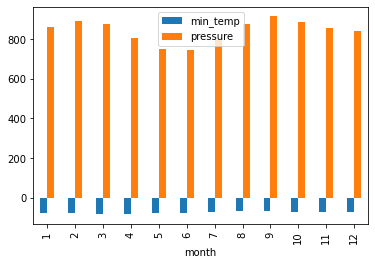

In [137]:
# Plot the avg atmospheric pressures per month
atm_pres.plot.bar()
plt.savefig("Avg atmospheric pressures per month")

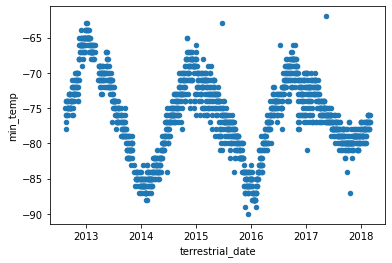

In [136]:
#Plot the average minimum temperature
table_df.plot.scatter('terrestrial_date','min_temp')
plt.savefig("Avg minimum temp across years")

In [132]:
# Export dataframe to a csv file
table_df.to_csv('Mars_df.csv', encoding='utf-8')